# Importing the libraries

In [51]:
import pandas as pd
import seaborn as sb
import pandas as pd
import matplotlib.pyplot as plt

# Reading the dataset and printing the main statistics

In [55]:
dataset = pd.read_csv('/content/data.csv')
print('==================================')
print(f'The shape of the dataset is {dataset.shape}.')
print(f'\n')
print(f'The columns present in the dataset are {list(dataset.columns)}')
print(f'\n')
print('==================================')
dataset = dataset.loc[:, ~dataset.columns.str.contains('^Unnamed')] # removing the garbage column
dataset["day"] = pd.to_datetime(dataset["day"]) # converting the data type of the day column to date time
dataset.sort_values(by='day', inplace=True) # sorting the dataset in ascending order
dataset = dataset.reset_index(drop=True) # resetting the index of the dataframe
dataset_deduped = dataset.drop_duplicates() # keeping the first duplicate row 
print(f'The number of missing values after removing the duplicates in each of the columns are \n{dataset_deduped.isna().sum()}')
print(f'\n')
print('==================================')
dataset_deduped.head()

The shape of the dataset is (1878, 9).


The columns present in the dataset are ['Unnamed: 0', 'day', 'item_number', 'item_name', 'purchase_price', 'suggested_retail_price', 'orders_quantity', 'sales_quantity', 'revenue']


The number of missing values after removing the duplicates in each of the columns are 
day                         0
item_number                 0
item_name                   0
purchase_price              0
suggested_retail_price      0
orders_quantity             0
sales_quantity              0
revenue                   476
dtype: int64




,day,item_number,item_name,purchase_price,suggested_retail_price,orders_quantity,sales_quantity,revenue
0,2021-04-03,80028349,UH ZWIEBELN DE-HE I 1KG GS,0.674928,1.055314,0.0,23.0,22.77
1,2021-04-03,80317483,ROMA TOMATEN ES I 500G SF,0.978451,1.546338,40.0,17.0,25.33
4,2021-04-03,80101923,SL MANDARINEN BEH.ES I 750G GS,1.991321,3.216415,0.0,2.0,5.98
6,2021-04-04,80028349,UH ZWIEBELN DE-HE I 1KG GS,0.674928,1.055314,0.0,0.0,NaN
7,2021-04-04,80101923,SL MANDARINEN BEH.ES I 750G GS,1.991321,3.216415,0.0,0.0,NaN


# Aggregated results for items

In [56]:
group_by_result = dataset_deduped.groupby('item_name').aggregate({'purchase_price': 'mean',
                             'suggested_retail_price': 'mean',
                             'orders_quantity':'sum',
                             'sales_quantity':'sum',
                             'revenue': 'mean'})
group_by_result

,purchase_price,suggested_retail_price,orders_quantity,sales_quantity,revenue
item_name,,,,,
ROMA TOMATEN ES I 500G SF,0.980293,1.543287,2190.0,1781.0,15.909405
SL MANDARINEN BEH.ES I 750G GS,1.993493,3.222473,434.0,398.0,22.370000
UH ZWIEBELN DE-HE I 1KG GS,0.676601,1.058444,5454.0,5554.0,24.650292


The above table shows the corresponding statistics about the dataset which include mean purchase price, mean suggested retail price, sum of orders which were given at the start of the day, sum of sales which happened at the end of the day and the mean of the revenue.

# Items ordered vs Items sold Time series plots 

In [57]:
group_by_result_1 = dataset_deduped.groupby(['day','item_name']).aggregate({
                             'orders_quantity':'sum',
                             'sales_quantity':'sum'})
group_by_result_1.reset_index(inplace=True) # resetting the index to get the index values as columns 
group_by_result_1

,day,item_name,orders_quantity,sales_quantity
0,2021-04-03,ROMA TOMATEN ES I 500G SF,40.0,17.0
1,2021-04-03,SL MANDARINEN BEH.ES I 750G GS,0.0,2.0
2,2021-04-03,UH ZWIEBELN DE-HE I 1KG GS,0.0,23.0
3,2021-04-04,ROMA TOMATEN ES I 500G SF,0.0,0.0
4,2021-04-04,SL MANDARINEN BEH.ES I 750G GS,0.0,0.0
...,...,...,...,...
934,2022-02-08,SL MANDARINEN BEH.ES I 750G GS,0.0,3.0
935,2022-02-08,UH ZWIEBELN DE-HE I 1KG GS,18.0,18.0
936,2022-02-09,ROMA TOMATEN ES I 500G SF,0.0,16.0
937,2022-02-09,SL MANDARINEN BEH.ES I 750G GS,0.0,3.0


In [80]:
# getting the sales statistics for the individual item names
item_1 = group_by_result_1[group_by_result_1['item_name'].isin(['ROMA TOMATEN ES I 500G SF'])]
item_2 = group_by_result_1[group_by_result_1['item_name'].isin(['SL MANDARINEN BEH.ES I 750G GS'])]
item_3 = group_by_result_1[group_by_result_1['item_name'].isin(['UH ZWIEBELN DE-HE I 1KG GS'])]

## ROMA TOMATEN ES I 500G SF

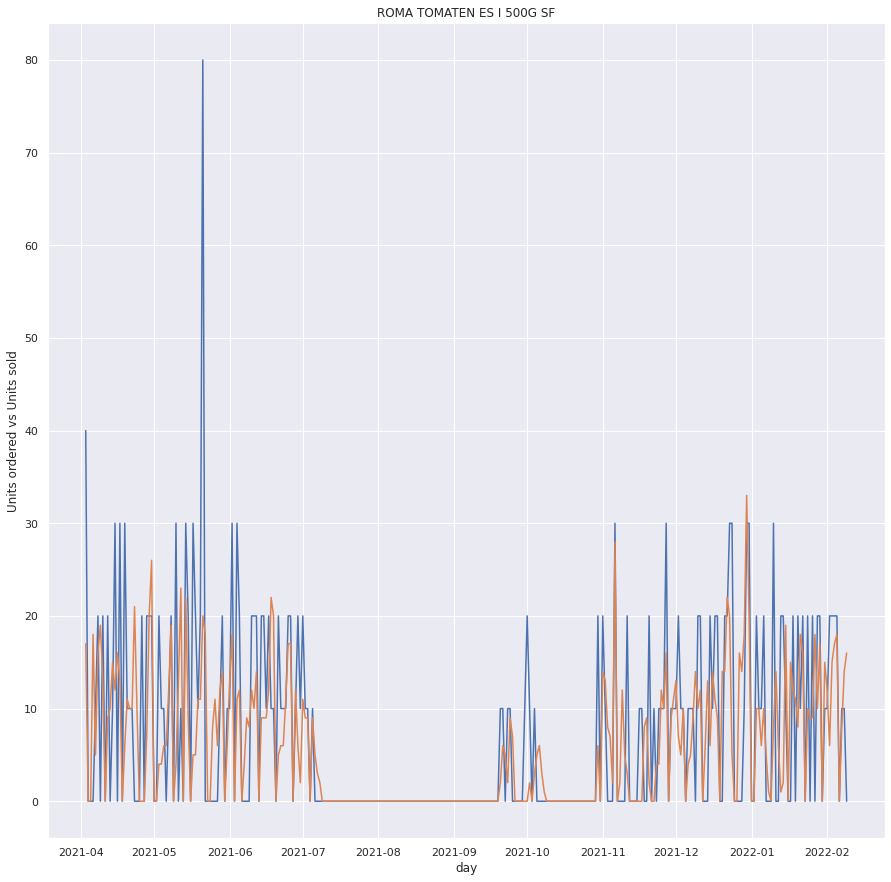

In [86]:
# time series plot at the month level for the orders made vs the actual units sold
sb.set(rc={'figure.figsize':(15,15)})

sb.lineplot(x="day", y="orders_quantity", data=item_1)
sb.lineplot(x="day", y="sales_quantity", data=item_1)

# set label
plt.ylabel("Units ordered vs Units sold")
plt.title("ROMA TOMATEN ES I 500G SF")

plt.show()

## SL MANDARINEN BEH.ES I 750G GS





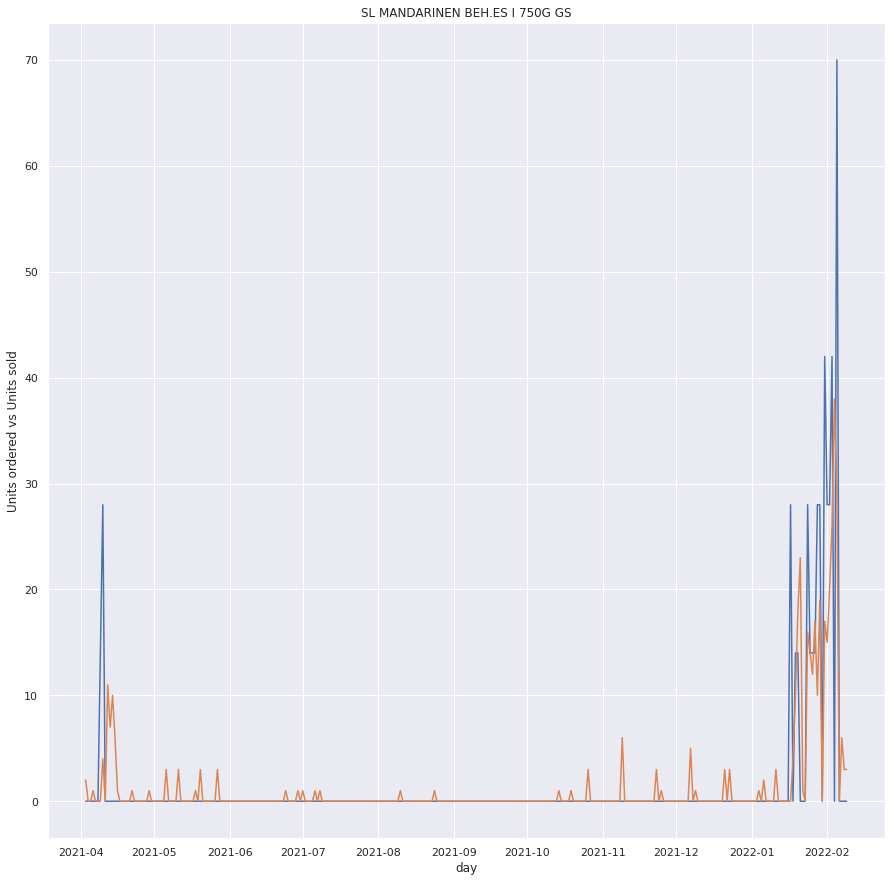

In [87]:
# time series plot at the month level for the orders made vs the actual units sold
sb.set(rc={'figure.figsize':(15,15)})
sb.lineplot(x="day", y="orders_quantity", data=item_2)
sb.lineplot(x="day", y="sales_quantity", data=item_2)

# set label
plt.ylabel("Units ordered vs Units sold")
plt.title("SL MANDARINEN BEH.ES I 750G GS")
plt.show()

## UH ZWIEBELN DE-HE I 1KG GS

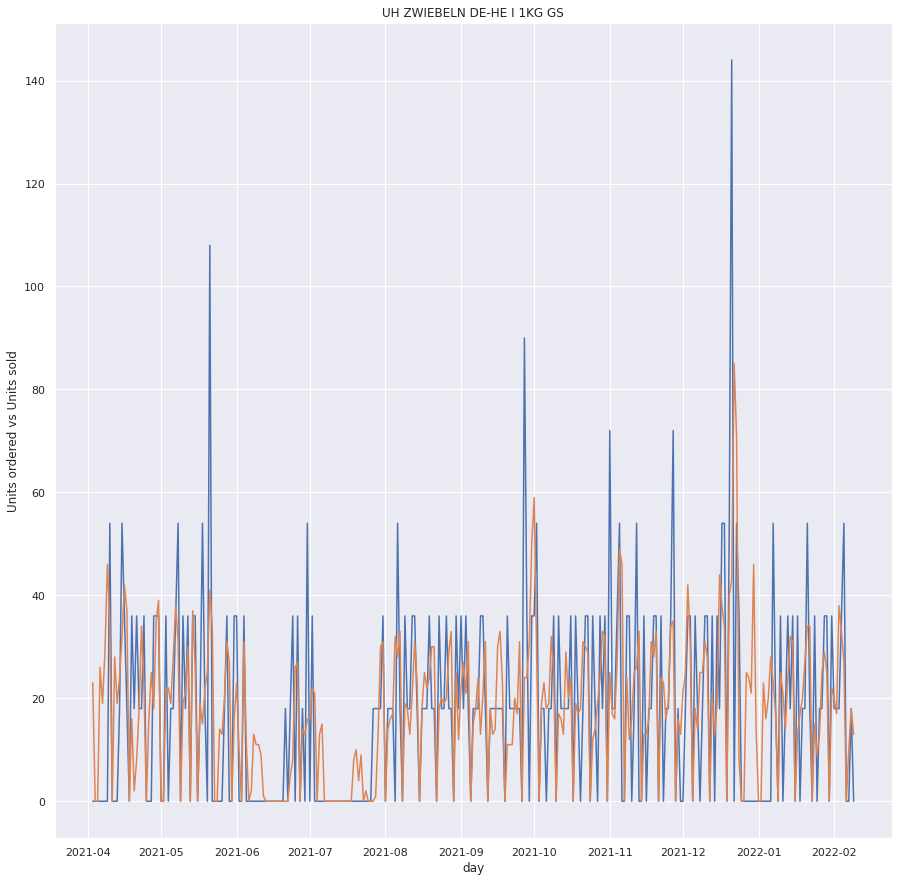

In [88]:
# time series plot at the month level for the orders made vs the actual units sold
sb.set(rc={'figure.figsize':(15,15)})
sb.lineplot(x="day", y="orders_quantity", data=item_3)
sb.lineplot(x="day", y="sales_quantity", data=item_3)

# set label
plt.ylabel("Units ordered vs Units sold")
plt.title("UH ZWIEBELN DE-HE I 1KG GS")
plt.show()

## Conclusions from time series plots

1. From the month of July 2021 to September 2021 for the item name ROMA TOMATEN ES I 500G SF the orders made at the beginning of the day are equal to the sales happened at the end of the day. 
2. For the item name SL MANDARINEN BEH.ES I 750G GS the orders made at the beginning of the day and the sales happened at the end of the day are mostly the same except for the month of April 2021 and January 2022. 
3. For the item name UH ZWIEBELN DE-HE I 1KG GS the orders made differs quite a lot from the sales happened at the end of the day. 

# Items ordered vs Items sold numeric analysis 

## ROMA TOMATEN ES I 500G SF

In [94]:
orders_match_sales = item_1[item_1['orders_quantity'] == item_1['sales_quantity']]
zero_orders = orders_match_sales[orders_match_sales['orders_quantity'] == 0]
print('===========================')
print(f'Total days : {len(item_1)}')
print(f'For {len(orders_match_sales)} days the orders made match the sales happened.On {len(orders_match_sales) - len(zero_orders)} days greater than zero orders were made.')
print('===========================')

Total days : 313
For 145 days the orders made match the sales happened.On 6 days greater than zero orders were made.


In [95]:
orders_under_estimated = item_1[item_1['orders_quantity'] < item_1['sales_quantity']]
print('===========================')
print(f'Total days : {len(item_1)}')
print(f'For {len(orders_under_estimated)} days the orders were underestimated and sales happened more.')
print('===========================')

Total days : 313
For 73 days the orders were underestimated and sales happened more.


In [96]:
orders_over_estimated = item_1[item_1['orders_quantity'] > item_1['sales_quantity']]
print('===========================')
print(f'Total days : {len(item_1)}')
print(f'For {len(orders_over_estimated)} days the orders were overestimated and sales happened less.')
print('===========================')

Total days : 313
For 95 days the orders were overestimated and sales happened less.


## SL MANDARINEN BEH.ES I 750G GS





In [97]:
orders_match_sales = item_2[item_2['orders_quantity'] == item_2['sales_quantity']]
zero_orders = orders_match_sales[orders_match_sales['orders_quantity'] == 0]
print('===========================')
print(f'Total days : {len(item_2)}')
print(f'For {len(orders_match_sales)} days the orders made match the sales happened.On {len(orders_match_sales) - len(zero_orders)} days greater than zero orders were made.')
print('===========================')

Total days : 313
For 257 days the orders made match the sales happened.On 1 days greater than zero orders were made.


In [98]:
orders_under_estimated = item_2[item_2['orders_quantity'] < item_2['sales_quantity']]
print('===========================')
print(f'Total days : {len(item_2)}')
print(f'For {len(orders_under_estimated)} days the orders were underestimated and sales happened more.')
print('===========================')

Total days : 313
For 43 days the orders were underestimated and sales happened more.


In [99]:
orders_over_estimated = item_2[item_2['orders_quantity'] > item_2['sales_quantity']]
print('===========================')
print(f'Total days : {len(item_2)}')
print(f'For {len(orders_over_estimated)} days the orders were overestimated and sales happened less.')
print('===========================')

Total days : 313
For 13 days the orders were overestimated and sales happened less.


## UH ZWIEBELN DE-HE I 1KG GS

In [100]:
orders_match_sales = item_3[item_3['orders_quantity'] == item_3['sales_quantity']]
zero_orders = orders_match_sales[orders_match_sales['orders_quantity'] == 0]
print('===========================')
print(f'Total days : {len(item_3)}')
print(f'For {len(orders_match_sales)} days the orders made match the sales happened.On {len(orders_match_sales) - len(zero_orders)} days greater than zero orders were made.')
print('===========================')

Total days : 313
For 77 days the orders made match the sales happened.On 6 days greater than zero orders were made.


In [101]:
orders_under_estimated = item_3[item_3['orders_quantity'] < item_3['sales_quantity']]
print('===========================')
print(f'Total days : {len(item_3)}')
print(f'For {len(orders_under_estimated)} days the orders were underestimated and sales happened more.')
print('===========================')

Total days : 313
For 121 days the orders were underestimated and sales happened more.


In [102]:
orders_over_estimated = item_3[item_3['orders_quantity'] > item_3['sales_quantity']]
print('===========================')
print(f'Total days : {len(item_3)}')
print(f'For {len(orders_over_estimated)} days the orders were overestimated and sales happened less.')
print('===========================')

Total days : 313
For 115 days the orders were overestimated and sales happened less.
